* 군집 분석 : 데이터 클러스터 세트의 관측값이 가지고 있는 여러 속성을 분석하여 서로 비슷한 속성을 갖는 관측값끼리 같은 군집으로 묶는 알고리즘
* 다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값(특이 데이터, 이상값, 중복값) 찾는데도 유용

* 군집의 목적 : 데이터로부터 유의미한 그룹들을 분리하는 것

* 분류 알고리즘과의 공통점 : 데이터를 비슷한 집단으로 묶는다.
* 차이점 : 분류는 소속 집단의 정보를 미리 알고 있는 상태에서 비슷한 집단으로 묶는 것이며, 군집화란 소속집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 방식(비지도 학습)

* 대표 알고리즘 : K-Means, DBSCAN, 계층적 군집:덴드로그램

* 군집의 기능 
1. 변수와 레코드가 아주 큰 상황인 경우 탐색적 데이터 분석의 연장으로 활용
2. 콜드 스타트 문제에서 유용한 방법
3. 모델을 훈련시킬 수 있는 응답 데이터를 초기에 가지고 있지 않은 경우 패턴이 비슷한 데이터들을 분류하여 학습 과정을 빨리 시작할 수 있도록 한다.
4. 군집의 결과로 얻은 그룹을 직접 사용할 수도 있고, 예측을 위한 회귀나 분류 모델의 입력 피처 또는 타겟 변수로 사용할 수도 있다.

* 군집의 활용
1. 소비자 행동 패턴 그룹화
2. 마케팅 - 시장 세분화, 고객 세분화
3. 금융 - 포트폴리오 구축 세분화, 투자 정보 데이터, 재무 상황 등
4. 온라인 쇼핑몰 - 유사 상품 탐색
5. 대형 마트 - 고객 장바구니 목록 분석하여 서로 같이 구매되는 제품들을 상품으로 기획하거나 진열에 참고

##### 붓꽃 데이터 군집화

##### k-means 클러스터링

* 원리가 단순하고 직관적이고 성능이 좋은 군집 알고리즘
* 데이터 크기가 커져도 손쉽게 사용이 가능하며 분할적 군집 분석이다. ( 군집의 수를 미리 결정한 뒤 군진화 수행)
* 각 관측자는 K개 군집 중 하나에 무조건 속하며, 2개 이상의 군집에 속하지 않는다. 
* 데이터 간 유사성을 측정하는 기준 : 각 군집의 중심(센트로이드)까지의 거리
* 데이터 정규화 필요성 : 정규화가 없는 경우 스케일이 가장 큰 변수가 군집 과정을 독점하게 된다.
* 몇 개의 군집으로 데이터를 구분할 것인가에 따라 모형의 성능이 달라진다.

* 장점 : 일반적인 군집화에서 가장 많이 사용되며 알고리즘이 쉽고 간결하다. 원형 크러스터를 구분하는 데 뛰어나다.
* 단점 : 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어진다. 반복을 수행하는데 반복 횟수가 많을 경우 시간 많이 걸리고 사전에 클러스터 개수를 지정해야하며, 몇 개의 군집을 선택해야 할 지 가이드가 어렵다.


In [1]:
# 데이터 셋(Dataset) 및 전처리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns = iris.feature_names)

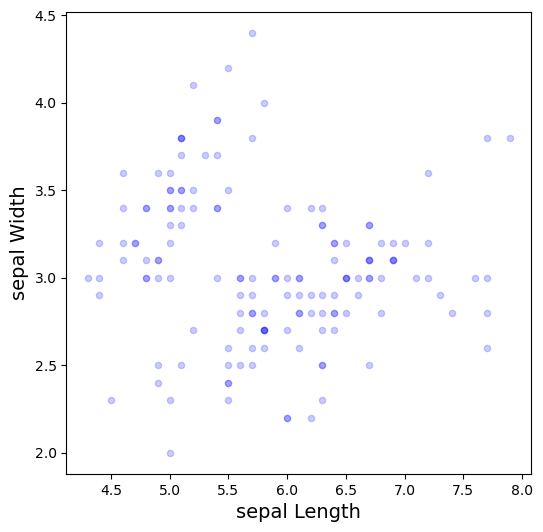

In [2]:
data = df_iris[['sepal length (cm)', 'sepal width (cm)']]

data.plot.scatter(x='sepal length (cm)', y = 'sepal width (cm)',
                  s = 20, c = 'blue', alpha = 0.2, figsize=(6, 6))

plt.xlabel('sepal Length', fontsize=14)
plt.ylabel('sepal Width', fontsize=14)
plt.show()

##### 군집 개수 K를 결정하는 방법
- 군집 분석이 정답이 없는 상태에서 데이터를 분석하는 비지도 학습이다 보니 최적의 군집의 개수 K를 결정하고 군집 결과를 평가하는 것이 다분히 주관적인 편이다.
- 사전에 산점도 등을 통해 데이터 특성 등을 확인하여 데이터가 뭉쳐 있는 그룹을 K로 선택하는 방법도 있다. 변수의 숫자가 많은 경우 차원 축소의 방법을 이용해 수를 줄여서 특성을 파악하기도 한다.

##### 최적의 K 찾기: 엘보우 방식

- KMeans에서 제공하는 이너셔(inertia)를 활용
- 이너셔 : 군집의 중심 ~ 개별 샘플 간의 거리의 제곱 합
- 군집에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값
- 군집의 수가 늘어나면 개별 군집의 크기는 줄어들므로 이너셔도 줄어든다. 엘보우 방법은 군집의 개수를 늘려가면서 이너셔의 변환을 관찰
- 그래프로 그리면 감소의 속도가 꺾이는 지점이 있는데, 이 지점부터는 군집의 개수를 늘려도 군집의 밀집도가 개선되지 않는다.

In [3]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, algorithm='auto')
    model.fit(data)
    inertias.append(model.inertia_)

inertias

[130.4752666666667,
 58.20409278906672,
 37.05070212765958,
 28.034982153246226,
 20.97958258795468,
 17.332868563685636,
 15.071006878306878,
 13.047563558408386,
 11.302825452325454]

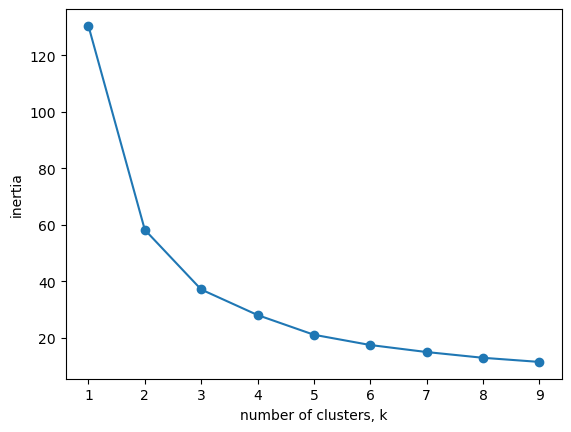

In [7]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

##### k를 3으로 군집 개수 지정

In [9]:
# k를 3개로
model1 = KMeans(n_clusters=3, random_state=0)

model1.fit(data)

pred = model1.predict(data)

# 각각의 클러스터의 중심 확인
centers = model1.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]]


In [10]:
model1_df = pd.concat([data, pd.Series(pred)], axis =1)
model1_df.rename(columns={'sepal length (cm)' : 'sepal length', 'sepal width (cm)': 'sepal width', 0:'predict'}, inplace = True)
print(model1_df)

     sepal length  sepal width  predict
0             5.1          3.5        2
1             4.9          3.0        2
2             4.7          3.2        2
3             4.6          3.1        2
4             5.0          3.6        2
..            ...          ...      ...
145           6.7          3.0        1
146           6.3          2.5        0
147           6.5          3.0        1
148           6.2          3.4        1
149           5.9          3.0        0

[150 rows x 3 columns]


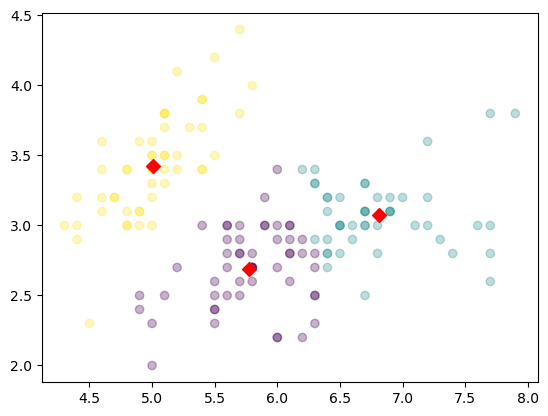

In [11]:
# 클러스터 및 중심 시각화

centers = pd.DataFrame(model1.cluster_centers_, columns = ['sepal length', 'sepal width'])
center_x = centers['sepal length']
center_y = centers['sepal width']

# scatter plot
plt.scatter(model1_df['sepal length'], model1_df['sepal width'], c= model1_df['predict'], alpha=0.3)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

In [13]:
model1.labels_ #과 pred 동일
# 상기 라벨은 실제 아이리스 종을 뜻하는 것이 아니라 군집이 0번째, 1번째, 2번째라는 것

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [15]:
# iris_fit = pd.concat([df_iris, pd.DataFrame(model1.labels_)], axis = 1)
# iris_fit.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species', 'KmeansFit']
# iris_fit

In [16]:
# 원래 값과 비교 (crosstab 활용)
# pd.crosstab(iris_fit.Species, iris_fit.KmeansFit)